In [41]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
                nn.Linear(10,1, bias=False)
        )
    
    def forward(self, x):
        return self.model(x)

In [81]:
m = Model()

In [ ]:
x = torch.rand(100,10)

e = torch.normal()

w = torch.rand(10,1)
y = x@w

In [96]:
data = TensorDataset(x,y)
train = DataLoader(data, batch_size=10)

Text(0.5, 1.0, '0.08653928339481354')

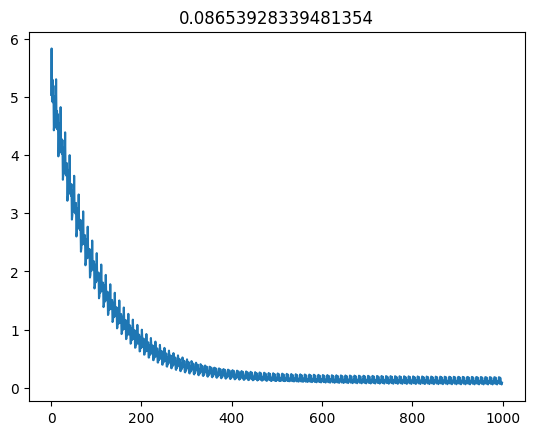

In [100]:
m = Model()

loss_fn = nn.MSELoss()
# optimizer = torch.optim.Adam(m.parameters(), lr=1e-3)
optimizer = torch.optim.SGD(m.parameters(), lr=1e-3)

losses = []

n_epochs = 100
for _ in range(n_epochs):
    for x_batch, y_batch in train:
        y_pred = m(x_batch)
        loss = loss_fn(y_pred, y_batch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

plt.plot(losses)
plt.title(loss.item())

In [93]:
[p for p in m.parameters()]

[Parameter containing:
 tensor([[0.1028, 0.4451, 0.9573, 0.2185, 0.1463, 0.0445, 0.7147, 0.0094, 0.9125,
          0.9956]], requires_grad=True)]

In [94]:
w

tensor([[0.1028],
        [0.4451],
        [0.9573],
        [0.2185],
        [0.1463],
        [0.0445],
        [0.7147],
        [0.0094],
        [0.9125],
        [0.9956]])

In [105]:
torch.inverse(x.T@x)@x.T@y

tensor([[0.1028],
        [0.4451],
        [0.9573],
        [0.2185],
        [0.1463],
        [0.0445],
        [0.7147],
        [0.0094],
        [0.9125],
        [0.9956]])